In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
# !pip install nltk
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer # Word net is a corpus of root words in its simplest form 

nltk.download('stopwords') # Installs the Corpus (collection) of common words   
nltk.download('punkt') #tokenizer method which uses unsupervised algorithm to create word into tokens
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /config/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /config/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /config/nltk_data...
[nltk_data] Downloading package omw-1.4 to /config/nltk_data...


True

## Alice in Wonderland

In [3]:
import requests
from nltk import FreqDist
from nltk.corpus import stopwords
import seaborn as sns
%matplotlib inline

In [4]:
url = "https://www.gutenberg.org/files/11/11-0.txt"
alice = requests.get(url)
print(alice.text)

ï»¿The Project Gutenberg eBook of Aliceâs Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: Aliceâs Adventures in Wonderland

Author: Lewis Carroll

Release Date: January, 1991 [eBook #11]
[Most recently updated: October 12, 2020]

Language: English

Character set encoding: UTF-8

Produced by: Arthur DiBianca and David Widger

*** START OF THE PROJECT GUTENBERG EBOOK ALICEâS ADVENTURES IN WONDERLAND ***

[Illustration]




Aliceâs Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down t

In [5]:
a = {}
for word in alice.text.split():
    if word in a:
        a[word] += 1
    else:
        a[word] = 1

a
    

{'ï»¿The': 1,
 'Project': 79,
 'Gutenberg': 22,
 'eBook': 6,
 'of': 605,
 'Aliceâ\x80\x99s': 13,
 'Adventures': 4,
 'in': 406,
 'Wonderland,': 2,
 'by': 79,
 'Lewis': 3,
 'Carroll': 3,
 'This': 20,
 'is': 85,
 'for': 147,
 'the': 1683,
 'use': 25,
 'anyone': 4,
 'anywhere': 3,
 'United': 15,
 'States': 7,
 'and': 783,
 'most': 12,
 'other': 42,
 'parts': 3,
 'world': 8,
 'at': 209,
 'no': 72,
 'cost': 3,
 'with': 214,
 'almost': 8,
 'restrictions': 2,
 'whatsoever.': 2,
 'You': 18,
 'may': 26,
 'copy': 8,
 'it,': 41,
 'give': 12,
 'it': 357,
 'away': 17,
 'or': 137,
 're-use': 2,
 'under': 21,
 'terms': 21,
 'License': 8,
 'included': 2,
 'this': 125,
 'online': 4,
 'www.gutenberg.org.': 2,
 'If': 19,
 'you': 306,
 'are': 60,
 'not': 129,
 'located': 7,
 'States,': 4,
 'will': 31,
 'have': 79,
 'to': 778,
 'check': 4,
 'laws': 9,
 'country': 5,
 'where': 12,
 'before': 22,
 'using': 8,
 'eBook.': 2,
 'Title:': 1,
 'Wonderland': 3,
 'Author:': 1,
 'Release': 1,
 'Date:': 1,
 'January,':

In [6]:
def plot_word_frequency(words, top_n=10):
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plot = sns.barplot(x=labels, y=counts)
    return plot

<Axes: >

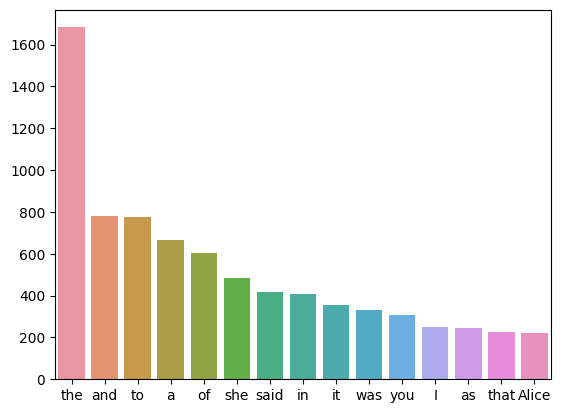

In [7]:
alice_words = alice.text.split()
plot_word_frequency(alice_words, 15)

## Remove stopwords

In [8]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
sample_text = "the great aim of education is not knowledge but action"

In [10]:
sample_words = sample_text.split()
sample_words

['the',
 'great',
 'aim',
 'of',
 'education',
 'is',
 'not',
 'knowledge',
 'but',
 'action']

In [11]:
sample_words = [word for word in sample_words if word not in stopwords.words('english')]
sample_words

['great', 'aim', 'education', 'knowledge', 'action']

In [12]:
sample_text = " ".join(sample_words)
print(sample_text)

great aim education knowledge action


In [13]:
alice_words = [word.lower() for word in alice_words]
no_stops = [word for word in alice_words if word not in stopwords.words("english")]

/config/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/config/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 156 (\x9c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


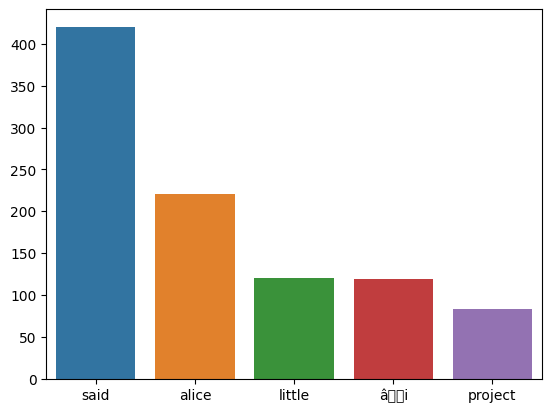

In [14]:
plot_word_frequency(no_stops, 5)
plt.show()

## Split vs. tokenize

In [15]:
document = "At nine o'clock I visited him myself. It looks like religious mania, and he'll soon think that he himself is God."
print(document)

At nine o'clock I visited him myself. It looks like religious mania, and he'll soon think that he himself is God.


In [16]:
print(document.split())

['At', 'nine', "o'clock", 'I', 'visited', 'him', 'myself.', 'It', 'looks', 'like', 'religious', 'mania,', 'and', "he'll", 'soon', 'think', 'that', 'he', 'himself', 'is', 'God.']


In [17]:
words = word_tokenize(document)
words

['At',
 'nine',
 "o'clock",
 'I',
 'visited',
 'him',
 'myself',
 '.',
 'It',
 'looks',
 'like',
 'religious',
 'mania',
 ',',
 'and',
 'he',
 "'ll",
 'soon',
 'think',
 'that',
 'he',
 'himself',
 'is',
 'God',
 '.']

## Twitter - tweet sentiment analysis

In [18]:
message = "i recently watched this show called mindhunters:). i totally loved it 😍. it was gr8 <3. #bingewatching #nothingtodo 😎"

In [19]:
print(word_tokenize(message))

['i', 'recently', 'watched', 'this', 'show', 'called', 'mindhunters', ':', ')', '.', 'i', 'totally', 'loved', 'it', '😍', '.', 'it', 'was', 'gr8', '<', '3', '.', '#', 'bingewatching', '#', 'nothingtodo', '😎']


In [20]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

In [21]:
tknzr.tokenize(message)

['i',
 'recently',
 'watched',
 'this',
 'show',
 'called',
 'mindhunters',
 ':)',
 '.',
 'i',
 'totally',
 'loved',
 'it',
 '😍',
 '.',
 'it',
 'was',
 'gr8',
 '<3',
 '.',
 '#bingewatching',
 '#nothingtodo',
 '😎']

## CountVectorizer

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
documents = [
    "Gangs of Wasseypur is a great movie.", 
    "The success of a movie depends on the performance of the actors.",
    "There are no new movies releasing this week."
]
print(documents)

['Gangs of Wasseypur is a great movie.', 'The success of a movie depends on the performance of the actors.', 'There are no new movies releasing this week.']


In [24]:
def preprocess(document):
    document = document.lower() # avoid differentiating if there is caps
    words = word_tokenize(document) # string to list of words
    words = [word for word in words if word not in stopwords.words("english")] # remove stop words
    document = " ".join(words)
    return document

In [25]:
documents = [preprocess(document) for document in documents]
print(documents)

['gangs wasseypur great movie .', 'success movie depends performance actors .', 'new movies releasing week .']


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(documents) # bag of words
pd.DataFrame(
    bow_model.toarray(), 
    columns = vectorizer.get_feature_names_out()
)

,actors,depends,gangs,great,movie,movies,new,performance,releasing,success,wasseypur,week
0,0,0,1,1,1,0,0,0,0,0,1,0
1,1,1,0,0,1,0,0,1,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,1


## Stemming and Lemmatization

In [27]:
ps = PorterStemmer()

In [28]:
test_words = ["desire", "desires","desirable", "desiring", "desiri", "eat", "eating", "ate", "feet", "foot"]

In [29]:
# Just the stem word
for w in test_words:
    print(w, "|", ps.stem(w))

desire | desir
desires | desir
desirable | desir
desiring | desir
desiri | desiri
eat | eat
eating | eat
ate | ate
feet | feet
foot | foot


In [30]:
# Semantic meaning
lemmatizer = WordNetLemmatizer()
for w in test_words:
    print(w, "|", lemmatizer.lemmatize(w))

desire | desire
desires | desire
desirable | desirable
desiring | desiring
desiri | desiri
eat | eat
eating | eating
ate | ate
feet | foot
foot | foot


## Question answer case study

In [31]:
data = pd.read_csv('textData.csv')
data.head(20)

,Question Number,Answer,Marks,Correct Answer
0,1.1,To simulate portions of the desired final prod...,5.0,To simulate the behaviour of portions of the d...
1,1.1,A prototype program simulates the behaviors of...,4.0,To simulate the behaviour of portions of the d...
2,1.1,Defined in the Specification phase a prototype...,5.0,To simulate the behaviour of portions of the d...
3,1.1,It is used to let the users have a first idea ...,3.0,To simulate the behaviour of portions of the d...
4,1.1,To find problem and errors in a program before...,2.0,To simulate the behaviour of portions of the d...
5,1.1,To address major issues in the creation of the...,2.5,To simulate the behaviour of portions of the d...
6,1.1,you can break the whole program into prototype...,5.0,To simulate the behaviour of portions of the d...
7,1.1,To provide an example or model of how the fini...,3.5,To simulate the behaviour of portions of the d...
8,1.1,Simulating the behavior of only a portion of t...,5.0,To simulate the behaviour of portions of the d...
9,1.1,A program that stimulates the behavior of port...,5.0,To simulate the behaviour of portions of the d...


In [32]:
correc_answer = data['Correct Answer'][0]
correc_answer

'To simulate the behaviour of portions of the desired software product.'

In [33]:
ans2 = data['Answer'][2]

In [34]:
ans4 = data['Answer'][4]

In [35]:
correc_answer = word_tokenize(correc_answer)
correc_answer

['To',
 'simulate',
 'the',
 'behaviour',
 'of',
 'portions',
 'of',
 'the',
 'desired',
 'software',
 'product',
 '.']

In [36]:
stop_w = stopwords.words('english') # We will only consider english words
stop_w

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
stop_w.extend('.')

In [38]:
correc_answer = [word for word in correc_answer if word not in stop_w]
correc_answer

['To', 'simulate', 'behaviour', 'portions', 'desired', 'software', 'product']

In [39]:
ps = PorterStemmer() 

In [40]:
correc_answer = [lemmatizer.lemmatize(w) for w in correc_answer]
correc_answer

['To', 'simulate', 'behaviour', 'portion', 'desired', 'software', 'product']

In [41]:
answers = [data['Answer'][2]]
answers.append(data['Answer'][4])
answers

['Defined in the Specification phase a prototype stimulates the behavior of portions of the desired software product.  Meaning, the role of a prototype is a temporary solution until the program itself is refined to be used extensively in problem solving.',
 'To find problem and errors in a program before it is finalized']

Text(0, 0.5, 'Number of words')

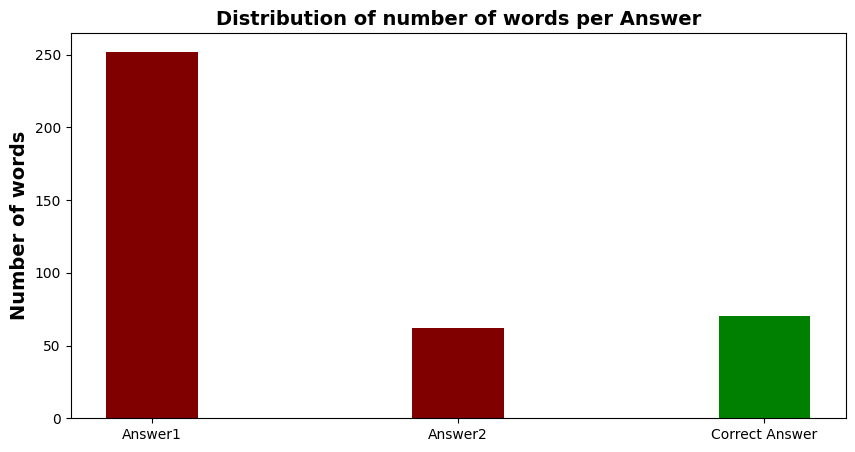

In [42]:
plt.figure(figsize=(10,5))
# plt.rcParams.update({'font.size': 14})
values = [len(answer) for answer in answers]
plt.bar(['Answer1','Answer2'], values, color ='maroon',width = 0.3)
plt.bar(['Correct Answer'], [len(data['Correct Answer'][0])], color ='green',width = 0.3)
plt.title('Distribution of number of words per Answer',weight='bold',fontsize=14)
plt.ylabel("Number of words",weight='bold',fontsize=14)

In [43]:
## Answer2
ans2 = word_tokenize(ans2)
ans2 = [word for word in ans2 if word not in stop_w]
ans2 = [lemmatizer.lemmatize(w) for w in ans2]

ans2

['Defined',
 'Specification',
 'phase',
 'prototype',
 'stimulates',
 'behavior',
 'portion',
 'desired',
 'software',
 'product',
 'Meaning',
 ',',
 'role',
 'prototype',
 'temporary',
 'solution',
 'program',
 'refined',
 'used',
 'extensively',
 'problem',
 'solving']

In [44]:
## Answer4
ans4 = word_tokenize(ans4)
ans4 = [word for word in ans4 if word not in stop_w]
ans4 = [lemmatizer.lemmatize(w) for w in ans4]

ans4

['To', 'find', 'problem', 'error', 'program', 'finalized']

In [45]:
docs = [
        ' '.join(correc_answer),
        ' '.join(ans2),
        ' '.join(ans4)
]

In [46]:
docs

['To simulate behaviour portion desired software product',
 'Defined Specification phase prototype stimulates behavior portion desired software product Meaning , role prototype temporary solution program refined used extensively problem solving',
 'To find problem error program finalized']

In [47]:
x1 = vectorizer.fit_transform(docs)

In [57]:
docs[0]

'To simulate behaviour portion desired software product'

In [56]:
df = pd.DataFrame(x1.toarray(), index = ['Correct Answer','Answer2','Answer4'], 
                  columns = vectorizer.get_feature_names_out())
df

,behavior,behaviour,defined,desired,error,extensively,finalized,find,meaning,phase,portion,problem,product,program,prototype,refined,role,simulate,software,solution,solving,specification,stimulates,temporary,to,used
Correct Answer,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0
Answer2,1,0,1,1,0,1,0,0,1,1,1,1,1,1,2,1,1,0,1,1,1,1,1,1,0,1
Answer4,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [49]:
def cosine_similarity(A,B):
    return np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))

In [50]:
array = df.values
correct_answer = array[0]
answer1 = array[1]
answer2 = array[2]


q1 = cosine_similarity(answer1,answer1)
q2 = cosine_similarity(correct_answer,answer1)
q3 = cosine_similarity(answer1,answer2)

q4 = cosine_similarity(correct_answer,answer2)
q5 = cosine_similarity(answer2,answer2)

q6 = cosine_similarity(correct_answer,correct_answer)

output = [  [q1,q2,q3],[q2,q6,q4],[q3,q4,q5] ]
output

[[1.0000000000000002, 0.31524416249564025, 0.17025130615174974],
 [0.31524416249564025, 0.9999999999999999, 0.1543033499620919],
 [0.17025130615174974, 0.1543033499620919, 1.0000000000000002]]

In [51]:
output = pd.DataFrame(output,index=['Answer1','Correct Answer','Answer2'], columns=['Answer1','Correct Answer','Answer2'])
output

,Answer1,Correct Answer,Answer2
Answer1,1.000000,0.315244,0.170251
Correct Answer,0.315244,1.000000,0.154303
Answer2,0.170251,0.154303,1.000000


Text(95.72222222222221, 0.5, ' ')

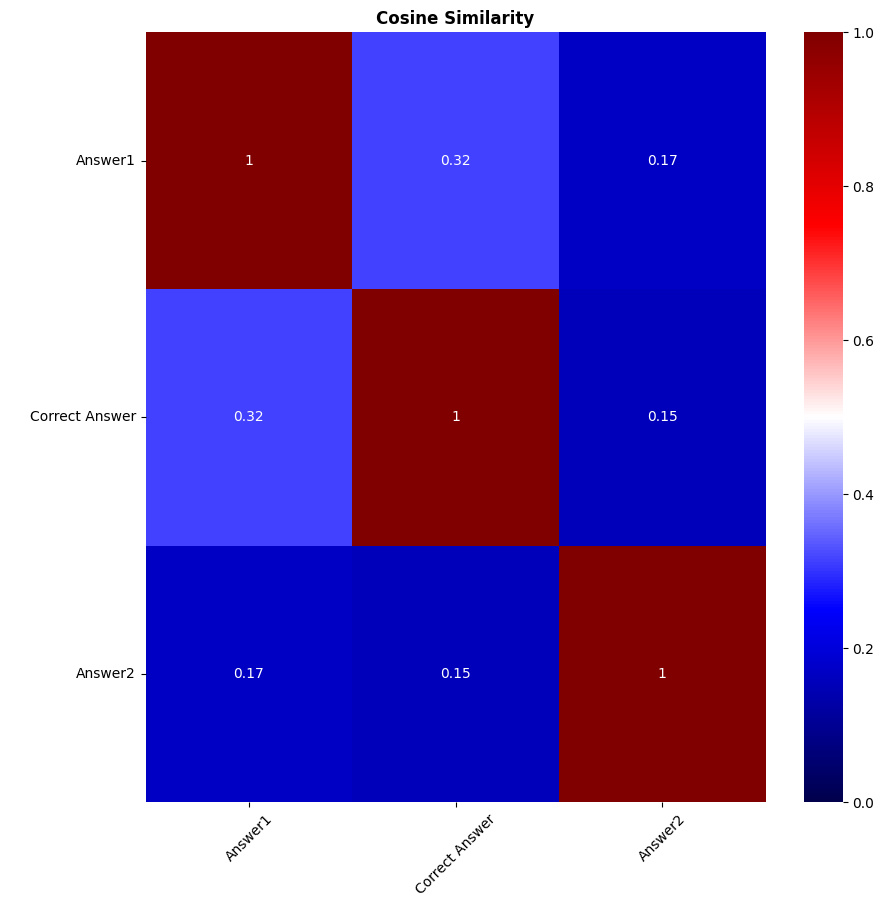

In [52]:
plt.figure(figsize=(10,10))
plt.title('Cosine Similarity',weight='bold')

sns.heatmap(output,vmin=0.0,vmax=1.0,cmap='seismic',annot=True)
plt.tick_params(labelbottom=True)
plt.yticks(rotation=0)
plt.xticks(rotation=45)

plt.ylabel(' ')